<a href="https://colab.research.google.com/github/bala1802/ERA/blob/main/Session-10/Session10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/Session10/modular

/content/drive/MyDrive/Session10/modular


# Clone Modular

In [17]:
!git clone "https://github.com/bala1802/modular.git"

In [4]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [5]:
cd /content/drive/MyDrive/Session10

/content/drive/MyDrive/Session10


# Libraries

In [6]:
!pip install -r /content/drive/MyDrive/Session10/modular/requirements.txt -q

In [7]:
import torch
from torchsummary import summary

# CUDA

In [8]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cuda


# Model Construction

In [9]:
from modular import custom_resnet

model_01 = custom_resnet.CustomResNet01().to(device)
summary(model_01, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 34, 34]           8,192
       BatchNorm2d-5          [-1, 128, 34, 34]             256
              ReLU-6          [-1, 128, 34, 34]               0
         MaxPool2d-7          [-1, 128, 17, 17]               0
            Conv2d-8          [-1, 128, 17, 17]         147,456
       BatchNorm2d-9          [-1, 128, 17, 17]             256
             ReLU-10          [-1, 128, 17, 17]               0
           Conv2d-11          [-1, 128, 17, 17]         147,456
      BatchNorm2d-12          [-1, 128, 17, 17]             256
             ReLU-13          [-1, 128, 17, 17]               0
           Conv2d-14          [-1, 256,

# Data Utils

In [10]:
from modular import datautils

CUDA Available? True


In [11]:
train_data = datautils.load_data(mode="train",
                                 transform=datautils.get_transforms(mode="train"))
test_data = datautils.load_data(mode="test",
                                transform=datautils.get_transforms(mode="test"))

len(train_data), len(test_data)

Files already downloaded and verified
Files already downloaded and verified


(50000, 10000)

In [12]:
train_loader = datautils.construct_loader(data=train_data)
test_loader = datautils.construct_loader(data=test_data)

len(train_loader), len(test_loader)

(98, 20)

# Model Utils

In [13]:
from modular import modelutils

# optimizer = modelutils.construct_optimizer(model=model_01, learning_rate=0.01, weight_decay=0.9)
# optimizer = modelutils.construct_optimizer(model=model_01, learning_rate=0.001, weight_decay=0.9)
# optimizer = modelutils.construct_optimizer(model=model_01, learning_rate=0.03, weight_decay=1e-4)
optimizer = modelutils.construct_optimizer(model=model_01)
criterion = modelutils.construct_cross_entropy_loss()

CUDA Available? True


/usr/local/lib/python3.10/dist-packages/torch_lr_finder/lr_finder.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


## LR Finder

  0%|          | 0/200 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 4.93E-02


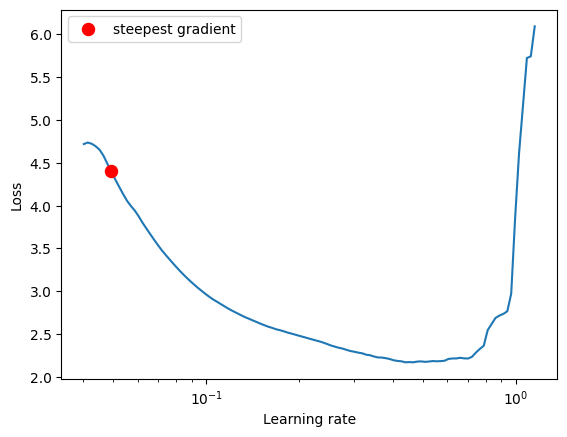

In [14]:
lr_finder = modelutils.construct_LR_finder(model=model_01,
                               optimizer=optimizer,
                               criterion=criterion,
                               device=modelutils.get_device(),
                               dataloader=train_loader,
                               end_learning_rate=10,
                               number_of_iterations=200,
                               step_mode="exp")
lr_finder.plot()
lr_finder.reset()

## LR Scheduler

In [15]:
EPOCHS=24

scheduler = modelutils.construct_scheduler(optimizer=optimizer,
                    data_loader=train_loader,
                    epochs=EPOCHS,
                    maximum_learning_rate=4.93E-02)

# Model Training and Testing

In [16]:
from modular import train
from modular import test

for epoch in range(EPOCHS):
  print("EPOCH: ", epoch)
  train.train(model=model_01, device=modelutils.get_device(), train_loader=train_loader,
        optimizer=optimizer, scheduler=scheduler, epoch=epoch, loss_function=criterion)
  test.test(model=model_01, device=modelutils.get_device(), test_loader=test_loader, loss_function=criterion)

EPOCH:  0


  0%|          | 0/98 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)
Loss=1.0182058811187744 Batch_id=97 Accuracy=50.53: 100%|██████████| 98/98 [00:37<00:00,  2.63it/s]



Test set: Average loss: 0.0023, Accuracy: 5885/10000 (58.85%)

EPOCH:  1


Loss=0.8956795930862427 Batch_id=97 Accuracy=65.53: 100%|██████████| 98/98 [00:36<00:00,  2.69it/s]



Test set: Average loss: 0.0018, Accuracy: 6818/10000 (68.18%)

EPOCH:  2


Loss=0.8191382884979248 Batch_id=97 Accuracy=71.30: 100%|██████████| 98/98 [00:37<00:00,  2.63it/s]



Test set: Average loss: 0.0021, Accuracy: 6437/10000 (64.37%)

EPOCH:  3


Loss=0.6446259617805481 Batch_id=97 Accuracy=74.85: 100%|██████████| 98/98 [00:37<00:00,  2.60it/s]



Test set: Average loss: 0.0015, Accuracy: 7323/10000 (73.23%)

EPOCH:  4


Loss=0.5404285192489624 Batch_id=97 Accuracy=78.21: 100%|██████████| 98/98 [00:37<00:00,  2.64it/s]



Test set: Average loss: 0.0018, Accuracy: 6888/10000 (68.88%)

EPOCH:  5


Loss=0.5559817552566528 Batch_id=97 Accuracy=79.72: 100%|██████████| 98/98 [00:37<00:00,  2.61it/s]



Test set: Average loss: 0.0015, Accuracy: 7308/10000 (73.08%)

EPOCH:  6


Loss=0.5218470096588135 Batch_id=97 Accuracy=81.05: 100%|██████████| 98/98 [00:37<00:00,  2.58it/s]



Test set: Average loss: 0.0015, Accuracy: 7436/10000 (74.36%)

EPOCH:  7


Loss=0.5276254415512085 Batch_id=97 Accuracy=82.19: 100%|██████████| 98/98 [00:38<00:00,  2.56it/s]



Test set: Average loss: 0.0013, Accuracy: 7873/10000 (78.73%)

EPOCH:  8


Loss=0.483659029006958 Batch_id=97 Accuracy=83.53: 100%|██████████| 98/98 [00:37<00:00,  2.62it/s]



Test set: Average loss: 0.0013, Accuracy: 7762/10000 (77.62%)

EPOCH:  9


Loss=0.48053401708602905 Batch_id=97 Accuracy=84.64: 100%|██████████| 98/98 [00:38<00:00,  2.58it/s]



Test set: Average loss: 0.0010, Accuracy: 8212/10000 (82.12%)

EPOCH:  10


Loss=0.4670870304107666 Batch_id=97 Accuracy=85.26: 100%|██████████| 98/98 [00:37<00:00,  2.60it/s]



Test set: Average loss: 0.0011, Accuracy: 8130/10000 (81.30%)

EPOCH:  11


Loss=0.3805040419101715 Batch_id=97 Accuracy=86.33: 100%|██████████| 98/98 [00:37<00:00,  2.62it/s]



Test set: Average loss: 0.0014, Accuracy: 7737/10000 (77.37%)

EPOCH:  12


Loss=0.31937822699546814 Batch_id=97 Accuracy=86.92: 100%|██████████| 98/98 [00:37<00:00,  2.59it/s]



Test set: Average loss: 0.0012, Accuracy: 7963/10000 (79.63%)

EPOCH:  13


Loss=0.43280357122421265 Batch_id=97 Accuracy=87.15: 100%|██████████| 98/98 [00:37<00:00,  2.60it/s]



Test set: Average loss: 0.0013, Accuracy: 7850/10000 (78.50%)

EPOCH:  14


Loss=0.3853107988834381 Batch_id=97 Accuracy=87.89: 100%|██████████| 98/98 [00:37<00:00,  2.65it/s]



Test set: Average loss: 0.0012, Accuracy: 8073/10000 (80.73%)

EPOCH:  15


Loss=0.30118605494499207 Batch_id=97 Accuracy=88.56: 100%|██████████| 98/98 [00:37<00:00,  2.59it/s]



Test set: Average loss: 0.0009, Accuracy: 8424/10000 (84.24%)

EPOCH:  16


Loss=0.25412729382514954 Batch_id=97 Accuracy=89.11: 100%|██████████| 98/98 [00:37<00:00,  2.59it/s]



Test set: Average loss: 0.0012, Accuracy: 8118/10000 (81.18%)

EPOCH:  17


Loss=0.302532434463501 Batch_id=97 Accuracy=89.44: 100%|██████████| 98/98 [00:37<00:00,  2.62it/s]



Test set: Average loss: 0.0009, Accuracy: 8546/10000 (85.46%)

EPOCH:  18


Loss=0.35534027218818665 Batch_id=97 Accuracy=89.88: 100%|██████████| 98/98 [00:36<00:00,  2.69it/s]



Test set: Average loss: 0.0015, Accuracy: 7608/10000 (76.08%)

EPOCH:  19


Loss=0.2566632330417633 Batch_id=97 Accuracy=90.36: 100%|██████████| 98/98 [00:37<00:00,  2.58it/s]



Test set: Average loss: 0.0013, Accuracy: 8019/10000 (80.19%)

EPOCH:  20


Loss=0.3255254924297333 Batch_id=97 Accuracy=90.32: 100%|██████████| 98/98 [00:37<00:00,  2.60it/s]



Test set: Average loss: 0.0023, Accuracy: 7038/10000 (70.38%)

EPOCH:  21


Loss=0.3220394551753998 Batch_id=97 Accuracy=90.79: 100%|██████████| 98/98 [00:37<00:00,  2.62it/s]



Test set: Average loss: 0.0011, Accuracy: 8244/10000 (82.44%)

EPOCH:  22


Loss=0.24948544800281525 Batch_id=97 Accuracy=91.12: 100%|██████████| 98/98 [00:38<00:00,  2.56it/s]



Test set: Average loss: 0.0010, Accuracy: 8325/10000 (83.25%)

EPOCH:  23


Loss=0.28432875871658325 Batch_id=97 Accuracy=91.32: 100%|██████████| 98/98 [00:37<00:00,  2.60it/s]



Test set: Average loss: 0.0015, Accuracy: 7664/10000 (76.64%)

